In [16]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import datetime as dt
from datetime import datetime,tzinfo
from pytz import timezone
import time
import pytz
import matplotlib.pyplot as plt
import csv

In [17]:
df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-03-27.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2,1417412100,300.0,300.0,300.0,300.0,0.01,3.0,300.0
3,1417412160,300.0,300.0,300.0,300.0,0.01,3.0,300.0
4,1417412220,300.0,300.0,300.0,300.0,0.01,3.0,300.0


In [18]:
# change time zone to UTC -0
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
df.Timestamp = df.Timestamp.dt.tz_localize('UTC')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 05:33:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,2014-12-01 05:34:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2,2014-12-01 05:35:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
3,2014-12-01 05:36:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
4,2014-12-01 05:37:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0


In [19]:
#Convert Timestamp into separate Date and Time
#temp = pd.DatetimeIndex(df['Timestamp']) #Gather all datetime objects

df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
df['Time'] = pd.to_datetime(df['Timestamp']).dt.time

del df['Timestamp'] #Delete original datetime column

df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time
0,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01,05:33:00
1,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01,05:34:00
2,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01,05:35:00
3,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01,05:36:00
4,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01,05:37:00


In [20]:
price=df['Close']

In [21]:
# calculate rolling average and standard deviation in one day period

min_periods = 43200

# Calculate the sd and volatility
mean=price.rolling(min_periods).mean()
sd=price.rolling(min_periods).std()
vol = price.rolling(min_periods).std() * np.sqrt(min_periods) 
df['Average']=mean
df['Volatility']=vol
df['SD']=sd
df.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time,Average,Volatility,SD
1686589,8155.00,8155.00,8154.99,8154.99,0.617945,5039.342643,8154.997667,2018-03-26,23:56:00,9434.270142,232584.323674,1119.021849
1686590,8154.99,8154.99,8154.00,8154.01,40.655410,331543.193980,8154.958865,2018-03-26,23:57:00,9434.234424,232587.698813,1119.038088
1686591,8154.00,8154.01,8150.00,8150.00,9.856911,80340.432933,8150.670628,2018-03-26,23:58:00,9434.198808,232591.105101,1119.054476
1686592,8150.01,8150.01,8122.82,8145.00,68.274269,555026.852280,8129.370847,2018-03-26,23:59:00,9434.163076,232594.538752,1119.070996
1686593,8144.99,8145.01,8140.00,8140.00,37.842674,308202.442620,8144.309384,2018-03-27,00:00:00,9434.127729,232598.022532,1119.087758


In [22]:
# select study dates range
index_1 = df[df.Date == datetime.date(dt.datetime.strptime('01/27/18', '%x'))].index[0]
index_2 = df[df.Date == datetime.date(dt.datetime.strptime('03/27/18', '%x'))].index[0]
df_1= df.loc[index_1:index_2]
#df_1= df.loc[index_1:,]
df_1.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time,Average,Volatility,SD
1601633,11086.88,11086.89,11086.88,11086.89,3.475604,38533.636812,11086.889272,2018-01-27,00:00:00,13354.785311,367199.735578,1766.690552
1601634,11086.89,11089.00,11086.88,11089.00,11.214766,124339.102380,11087.088342,2018-01-27,00:01:00,13354.685122,367200.933752,1766.696316
1601635,11089.00,11099.00,11089.00,11098.99,25.761195,285765.230790,11092.856235,2018-01-27,00:02:00,13354.585167,367202.070136,1766.701784
1601636,11098.99,11099.00,11098.99,11099.00,1.083112,12021.453112,11098.998581,2018-01-27,00:03:00,13354.485213,367203.205280,1766.707245
1601637,11098.99,11099.00,11098.99,11098.99,4.025234,44676.062985,11098.997333,2018-01-27,00:04:00,13354.386095,367204.540260,1766.713668


In [23]:
df_2=df_1.groupby(df_1.Date).mean()
df_2.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Average,Volatility,SD
Date,,,,,,,,,,
2018-01-27,11177.254542,11182.093500,11172.314326,11177.383819,8.325551,93366.121547,11177.335040,13299.159649,370485.506037,1782.499222
2018-01-28,11425.907035,11430.281958,11422.407681,11426.112271,9.252465,105956.501345,11426.139665,13198.271418,375054.817538,1804.483332
2018-01-29,11137.583674,11140.958229,11133.652896,11137.279299,7.619312,84888.235432,11137.324422,13102.589609,379154.300212,1824.206977
2018-01-30,10621.101118,10627.480681,10613.562326,10620.313118,18.900901,194549.235567,10620.605888,13025.871604,387245.629262,1863.136402
2018-01-31,9978.939889,9986.435667,9970.953299,9978.950660,13.351993,132254.567681,9978.619754,12914.256311,400836.959836,1928.527722


In [24]:
# find date have average change larger than 2 times sd change
marker=[]
avechange=[]
sdchange=[]
for i in range(len(df_2)-1):
    avediff=(df_2['Average'].iloc[i+1]-df_2['Average'].iloc[i])/df_2['Average'].iloc[i]
    sddiff=(df_2['SD'].iloc[i+1]-df_2['SD'].iloc[i])/df_2['SD'].iloc[i]
    avechange.append(avediff)
    sdchange.append(sddiff)
   # if abs(avechange[i]) > 2*(df_2['SD'].iloc[i]):
    if abs(avechange[i]) > 2*(sdchange[i]):
        marker.append(df_2.index[i])   

In [25]:
marker

[datetime.date(2018, 2, 4),
 datetime.date(2018, 2, 5),
 datetime.date(2018, 2, 6),
 datetime.date(2018, 2, 7),
 datetime.date(2018, 2, 8),
 datetime.date(2018, 2, 9),
 datetime.date(2018, 2, 10),
 datetime.date(2018, 2, 11),
 datetime.date(2018, 2, 12),
 datetime.date(2018, 2, 13),
 datetime.date(2018, 2, 14),
 datetime.date(2018, 2, 15),
 datetime.date(2018, 2, 16),
 datetime.date(2018, 2, 17),
 datetime.date(2018, 2, 18),
 datetime.date(2018, 2, 19),
 datetime.date(2018, 2, 20),
 datetime.date(2018, 2, 21),
 datetime.date(2018, 2, 22),
 datetime.date(2018, 2, 23),
 datetime.date(2018, 2, 24),
 datetime.date(2018, 2, 25),
 datetime.date(2018, 2, 26),
 datetime.date(2018, 2, 27),
 datetime.date(2018, 2, 28),
 datetime.date(2018, 3, 6),
 datetime.date(2018, 3, 7),
 datetime.date(2018, 3, 8),
 datetime.date(2018, 3, 9),
 datetime.date(2018, 3, 10),
 datetime.date(2018, 3, 11),
 datetime.date(2018, 3, 12),
 datetime.date(2018, 3, 13),
 datetime.date(2018, 3, 20),
 datetime.date(2018, 3, 

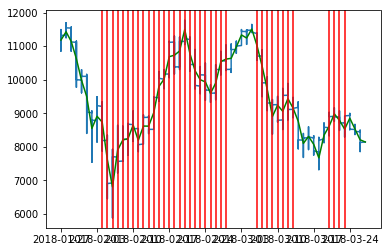

In [26]:
plt.plot(df_1.Date,df_1.Weighted_Price)
plt.plot(df_2.index,df_2.Weighted_Price,c='g')
for xc in marker:
    plt.axvline(x=xc,c='r')
plt.show()

In [15]:
df = pd.DataFrame({'Date':marker})
df.to_csv('marker.csv',index=False)